# Synthetic Seismogram Widget

## Using the Notebook

This is the <a href="https://jupyter.org/">Jupyter Notebook</a>, an interactive coding and computation environment. For this lab, you do not have to write any code, you will only be running it. 

To use the notebook:
- "Shift + Enter" runs the code within the cell (so does the forward arrow button near the top of the document)
- You can alter variables and re-run cells
- If you want to start with a clean slate, restart the Kernel either by going to the top, clicking on Kernel: Restart, or by "esc + 00" (if you do this, you will need to re-run Step 0 before running any other cells in the notebook) 

Instructions as to how to set up Python and the iPython notebook on your personal computer are attached in the appendix of the lab

## Step 0: Import Necessary Packages

In [1]:
# Import the necessary packages
%matplotlib inline   
import sys
sys.path.append("../NotebookCode/Seismic/SyntheticSeismogram")
from SeisWidgetImport import *

# 1 Normal Incidence Seismogram

## Backgrounds: Normal Incidence Seismogram

We begin by constructing a reflectivity series from the physical property model. The physical properties characterizing the model are:
- density ($\rho$) and 
- seismic velocity ($v$)

The acoustic impedance of each layer is:
$$
Z_i = \rho_i v_i
$$

From acoustic impedance, the down-going reflection coefficient for each interface is given by
$$
r_{i,i+1} = \frac{Z_{i+1}-Z_i}{Z_{i+1}+Z_i}
$$

and the transmission coefficient is
$$
t_{i,i+1} = \frac{2Z_{i}}{Z_{i+1}+Z_i}
$$

<img src="https://github.com/geoscixyz/gpgLabs/blob/OrganizeNotebooks/NotebookFigures/Seismic/rt1interface.png?raw=true" style="width: 40%; height: 40%"></img>
#### Figure 1. Normal incidence for two layers model.

The true reflectivity accounts for both reflection and transmission. For the reflection off of the first layer, these are equivalent. For the reflection off of the second interface, the reflection coefficient $r_{2,3}$ in multiplied by $t_{1,2}t_{2,1}$ to get the true reflectivity. In the below plot, this effect of the transmission coefficients can be included or not using the toggle "usingT."

<img src="https://github.com/geoscixyz/gpgLabs/blob/OrganizeNotebooks/NotebookFigures/Seismic/rt2interface.png?raw=true" style="width: 40%; height: 40%"></img>
#### Figure 2. Normal incidence for three layers model.

### Setup for constructing a synthetic seismogram

We will consider a model consisting of two horizontal layers over a half-space. Each layer has density $\rho_i$ and seismic velocity $v_i$. In this notebook, we will start from the physical property model and walk through how to construct a synthetic, normal incidence seismogram. 

<img src="https://github.com/geoscixyz/gpgLabs/blob/OrganizeNotebooks/NotebookFigures/Seismic/geoModel.png?raw=true" style="width: 50%; height: 50%"></img>
#### Figure 3. Three layer model

## 1.1 Reflection coefficient and Reflectivity
### From Physical Properties to a Reflectivity Series

**Parameters of the below widget are:**

- *d2*: depth of the interface between layer 1 and 2
- *d3*: depth of the interface between layer 2 and 3
- *rho1*: density of the layer 1 ($kg/m^3$)
- *rho2*: density of the layer 2 ($kg/m^3$)
- *rho3*: density of the layer 3 ($kg/m^3$)
- *v1*: velocity of the layer 1 ($m/s$)
- *v2*: velocity of the layer 2 ($m/s$)
- *v3*: velocity of the layer 3 ($m/s$)
- *usingT*: switch for considering transmission coefficient for reflectivity

In [2]:
LogVal = InteractLogs(v1=1500,v2=1500,v3=1500)
LogVal

## 1.2 Depth to Time conversion

Now we have the reflectivity series as a function of depth. With seismic, we measure a signal as a function of time. So we must apply a conversion from depth to time. We do this by computing the time it takes for a signal to reach a given depth and return to the surface. 

In [3]:
InteractDtoT(LogVal)

## 1.3 Constructing the ideal seismogram
### Wavelet $\otimes$ Reflectivity = Seismogram

Now that we have the reflectivity series in time, the next step is to choose the input pulse and construct our seismogram. For the following examples, we will use a <a href="http://subsurfwiki.org/wiki/Ricker_wavelet">Ricker Wavelet</a> with peak frequency $f$. 

A seismogram is the convolution of the wavelet and reflectivity series. Here, you can adjust the peak frequency (wavF) of the wavelet and its amplitude (wavA). 

The geologic model used is:
<img src="https://github.com/geoscixyz/gpgLabs/blob/OrganizeNotebooks/NotebookFigures/Seismic/Step3FixedMod.png?raw=true" style="width: 50%; height: 50%"></img>

In [4]:
InteractWconvR()

<function syntheticSeismogram.plotSeismogramInteractFixMod>

## 1.4 Vertical Resolution

When referring to vertical resolution, the question to ask is: "Can the two arrivals (one from the top, and one from the bottom of the layer) be distinguished?" 

Adjust the layer thickness for the middle layer (by adjusting d2 and/or d3) and the frequency of the input pulse to investigate vertical resolution. You can also add noise to the trace. 

The geologic model is:
<img src="https://github.com/geoscixyz/gpgLabs/blob/OrganizeNotebooks/NotebookFigures/Seismic/geoModel.png?raw=true" style="width: 50%; height: 50%"></img>

You can adjust all of the parameters. Have fun!

GPG section: http://gpg.geosci.xyz/content/seismic/seismic_reflection_interpretation.html

**Parameters of the below widget are:**

- d2: depth of the interface between layer 1 and 2
- d3: depth of the interface between layer 2 and 3
- rho1: density of the layer 1 ($kg/m^3$)
- rho2: density of the layer 2 ($kg/m^3$)
- rho3: density of the layer 3 ($kg/m^3$)
- v1: velocity of the layer 1 ($m/s$)
- v2: velocity of the layer 2 ($m/s$)
- v3: velocity of the layer 3 ($m/s$)
- wavef: peak frequency of the Ricker wavelet
- waveA: amplitude of Ricker wavelet
- AddNoise: swith for adding noise 
- usingT: switch for considering transmission coefficient for reflectivity

In [5]:
InteractSeismogram()

<function syntheticSeismogram.plotSeismogramInteract>

# Constructing a Normal Incidence Seismic Trace from CMP gather data

## 2.1 Sketch the problem

No app for this section. 

## 2.2 From CMP gather to a Seismic Trace

### Background: Fit A Hyperbola to the Data

- Each reflection event in a CMP gather has a travel time that corresponds to a hyperbola: $$ t(x) = \sqrt{\frac{x^2}{v^2_{stacking}} + t_0^2} \\$$ where $x$ is offset between source and receiver, $v_{stacking}$ is stacking velocity, and $t_0$ is the intercept time: $$ t_0 = \sqrt{\frac{4d^2}{v^2_{stacking}}} \\$$ where $d$ is the thickness of the first layer.

- For each reflection event hyperbola, perform a velocity analysis to find $v_{stacking}$. This is done by first choosing $t_o$. Then choose a trial value of velocity. <img src="http://www.eos.ubc.ca/courses/eosc350/content/methods/meth_10d/assets/kearey_fig4_21.gif"></img>

- Calculate the Normal Moveout Correction: Using the hyperbolia corresponding to $v_{stacking}$, compute the normal moveout for each trace and then adjust the reflection time by the amount $\triangle T$: $$ \triangle T = t_0-t(x) \\ $$ <img src="http://www.eos.ubc.ca/courses/eosc350/content/methods/meth_10d/assets/ch1_fig8.gif"></img>

Estimate $t_0$, and a plausible $v_{stack}$ by altering t0 and v using below widget. This hyperbola will be drawn as red hyperbola on the middle panel. On the right panel we apply stack with the velocity that you fit, and provice stacked trace.

GPG section: (http://gpg.geosci.xyz/content/seismic/seismic_reflection_stacking.html#)

### Two common-mid-point (CMP) gathers: Clean and Noisy

We have two CMP gathers generated from different geologic models. One data set is clean and the other is contaminated with noise. The seismic data were adapted from SeismicLab (http://seismic-lab.physics.ualberta.ca/). 

In this section, we will walk through how to construct a normal incidence seismogram from these data sets.

We will do this in the following steps:
- Plot the data
- Perform the NMO correction and stack for the clean data
- Perform the NMO correction and stack for the noisy data

### Step 1: Plot the data

As you can see from clean CMP gather, you can recognize that we have only have one reflector, meaning there is a single interface seperating two geologic units visible in these data. 
(Note: The direct and any refracted arrivals have been removed). 

It is difficult to distinguish any reflectors in the noisy data. However, there is a single reflector in these data, and we will perform normal moveout (NMO) and stacking operations to construct a normal-incidence seismogram where this reflector is visible.  

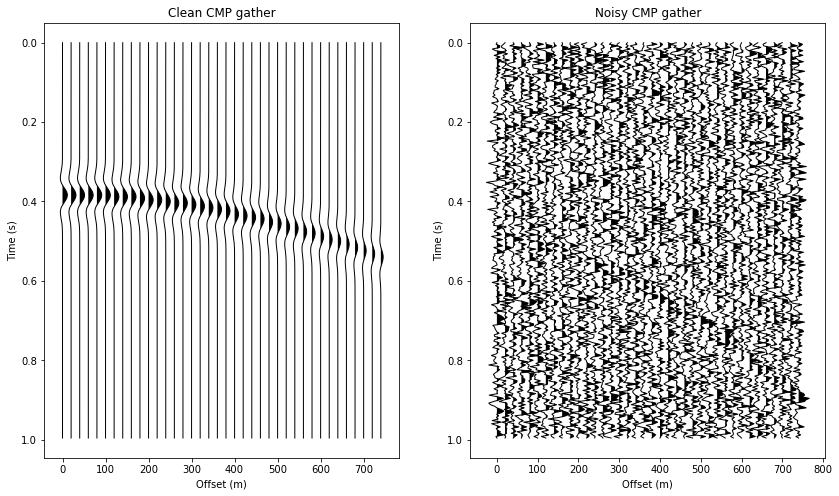

In [6]:
# Plot the data
ViewWiggle(syndata, obsdata)

### Step 2: Perform the NMO correction and stack for the clean data

**Parameters of the below widget to fit observed reflection event are:**

- *t0*: intercept time of the hyperbola 
- *v*: velocity of the hyperbola

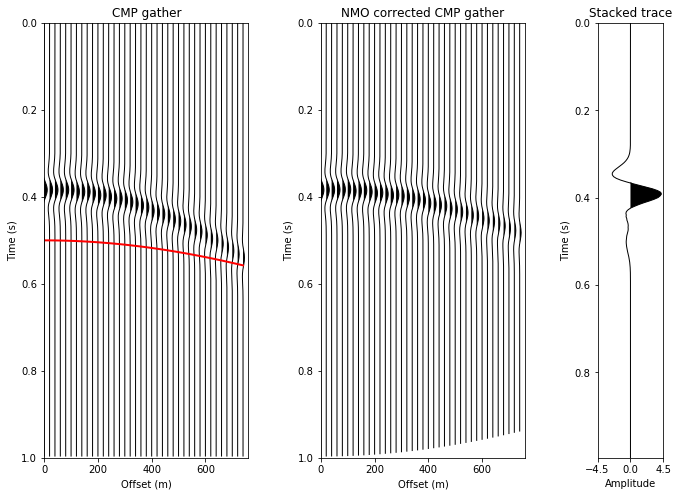

In [7]:
# Fit hyperbola to clean data
clean = InteractClean()
clean

### Step 3: Applying NMO correction to the Noisy Data

Compared to the previous data set, this one is quite noisy. There is a reflector in the data, and your goal is to construct a stacked trace where this reflection is visible. 

Estimate $t_0$, and a plausible $v_{stack}$ by altering t0 and v using below widget. This hyperbola will be drawn as red hyperbola on the middle panel. On the right panel we apply stack with the velocity that you fit, and provice stacked trace.

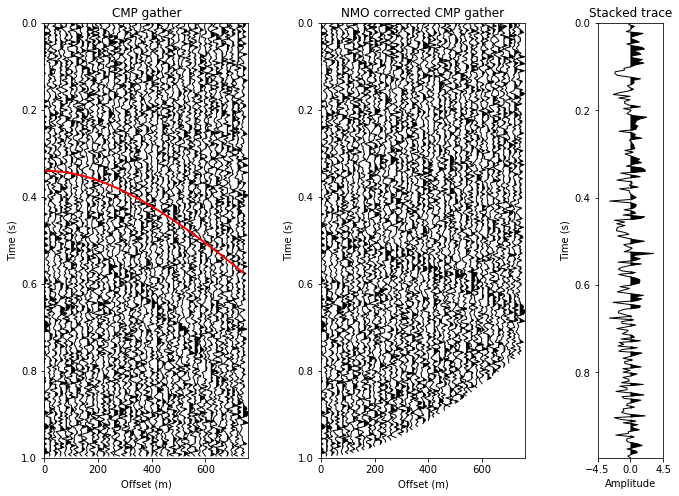

In [8]:
noisy = InteractNosiy()
noisy

In the previous step, you chose an intercept time (t0) and a stacking velocity (v). Running below cell will generate trhee stacked traces:
- Left: using t0 and v-200 m/s that we fit from Step 3
- Middle: using t0 and v that we fit from Step 3
- Right: using t0 and v+200 m/s that we fit from Step 3

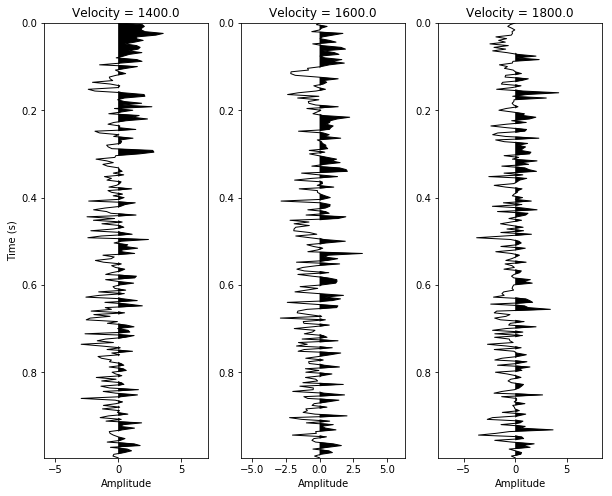

In [9]:
NMOstackthree(obsdata, noisy.kwargs["t0"], noisy.kwargs["v"]-200., noisy.kwargs["v"], noisy.kwargs["v"]+200.)

### 2.3 Finding the best hyperbola: Semblance analysis

No app for this section